In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau
import seaborn as sns

In [8]:

df = pd.read_csv(r'C:\Users\JENNIFER AMIOSINOR\Downloads/Salary Data.csv')



In [9]:
df

,Age,Gender,Education Level,Job Title,YearsofExperience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [10]:
df.describe()

,Age,YearsofExperience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [11]:
{columns: list(df[columns].unique()) for columns in df.columns}

{'Age': [32.0,
  28.0,
  45.0,
  36.0,
  52.0,
  29.0,
  42.0,
  31.0,
  26.0,
  38.0,
  48.0,
  35.0,
  40.0,
  27.0,
  44.0,
  33.0,
  39.0,
  25.0,
  51.0,
  34.0,
  47.0,
  30.0,
  41.0,
  37.0,
  24.0,
  43.0,
  50.0,
  46.0,
  49.0,
  23.0,
  53.0,
  nan],
 'Gender': ['Male', 'Female', nan],
 'Education Level': ["Bachelor's", "Master's", 'PhD', nan],
 'Job Title': ['Software Engineer',
  'Data Analyst',
  'Senior Manager',
  'Sales Associate',
  'Director',
  'Marketing Analyst',
  'Product Manager',
  'Sales Manager',
  'Marketing Coordinator',
  'Senior Scientist',
  'Software Developer',
  'HR Manager',
  'Financial Analyst',
  'Project Manager',
  'Customer Service Rep',
  'Operations Manager',
  'Marketing Manager',
  'Senior Engineer',
  'Data Entry Clerk',
  'Sales Director',
  'Business Analyst',
  'VP of Operations',
  'IT Support',
  'Recruiter',
  'Financial Manager',
  'Social Media Specialist',
  'Software Manager',
  'Junior Developer',
  'Senior Consultant',
  'Pro

In [12]:
df.isnull().sum()

Age                  2
Gender               2
Education Level      2
Job Title            2
YearsofExperience    2
Salary               2
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                373 non-null    float64
 1   Gender             373 non-null    object 
 2   Education Level    373 non-null    object 
 3   Job Title          373 non-null    object 
 4   YearsofExperience  373 non-null    float64
 5   Salary             373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [14]:
mean_age = df['Age'].mean()
year_exp = df['YearsofExperience'].mean()
mean_salary = df['Salary'].mean()

In [15]:
df['Age'] = df['Age'].fillna(mean_age)
df['YearsofExperience'] = df['YearsofExperience'].fillna(year_exp)
df['Salary'] = df['Salary'].fillna(mean_salary)

In [16]:
df.isnull().sum()

Age                  0
Gender               2
Education Level      2
Job Title            2
YearsofExperience    0
Salary               0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

Age                  0
Gender               0
Education Level      0
Job Title            0
YearsofExperience    0
Salary               0
dtype: int64

In [19]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

<ipython-input-19-d5551b052bbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})


In [20]:
df

,Age,Gender,Education Level,Job Title,YearsofExperience,Salary
0,32.0,0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,1,Master's,Data Analyst,3.0,65000.0
2,45.0,0,PhD,Senior Manager,15.0,150000.0
3,36.0,1,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,0,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,1,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,0,Master's,Director of Operations,19.0,170000.0
372,29.0,1,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,0,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [21]:
## df.drop(columns = ['Education Level', 'Job Title'], inplace = True)

In [22]:
spearman_corr, spearman_p = spearmanr(df['YearsofExperience'], df['Salary'])
print('Spearman correlation coefficient:', spearman_corr)
print('Spearman correlation p-value:', spearman_p)

Spearman correlation coefficient: 0.9405233050878236
Spearman correlation p-value: 4.939973053342636e-176


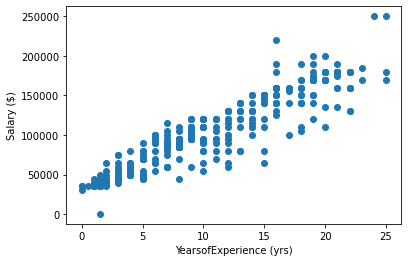

In [23]:
#%matplotlip inline
plt.xlabel('YearsofExperience (yrs)')
plt.ylabel('Salary ($)')
plt.scatter(df.YearsofExperience, df.Salary)


<AxesSubplot:xlabel='Gender', ylabel='Salary'>

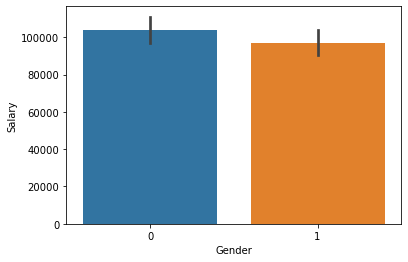

In [24]:
sns.barplot(x = 'Gender', y = 'Salary', data = df)

<AxesSubplot:xlabel='YearsofExperience', ylabel='Salary'>

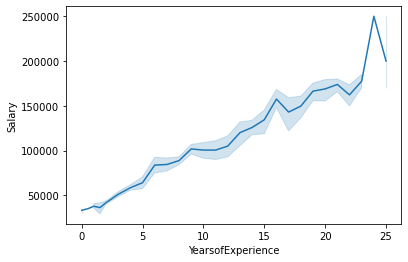

In [25]:
sns.lineplot(x = 'YearsofExperience', y = 'Salary', data = df)

In [26]:
pip install xgboost

In [27]:
#Divide the complete dataset into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [28]:
df.drop(columns = ['Education Level', 'Job Title'], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
X = df.drop(columns = ['Salary'])
y = df['Salary']

In [30]:
test_data = df.tail(10)


In [31]:
df = df.head(363)

In [35]:
X.shape

(363, 3)

In [37]:
y.shape

(363,)

In [38]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
rf = RandomForestRegressor()
xg = XGBRegressor()

In [41]:
rf.fit(X_train, y_train)
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
y_pred_rf = rf.predict(X_test)
y_pred_xg = xg.predict(X_test)

In [43]:
train_accuracy_rf = rf.score(X_train, y_train)
test_accuracy_rf = rf.score(X_test, y_test)

In [44]:
print('train_accuracy_rf:', train_accuracy_rf)
print('test_accuracy_rf:', test_accuracy_rf)

train_accuracy_rf: 0.9485236248320196
test_accuracy_rf: 0.8902346952015985


In [46]:
train_accuracy_xg =xg.score(X_train, y_train)
test_accuracy_xg = xg.score(X_test, y_test)

In [47]:
print('train_accuracy_xg:', train_accuracy_xg)
print('test_accuracy_xg:', test_accuracy_xg)

train_accuracy_xg: 0.9585573583747897
test_accuracy_xg: 0.8892396415184886


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

In [50]:
print('mae:', mae)
print('mse:', mse)
print('r2:', r2)

mae: 9088.019922315127
mse: 215461527.97493705
r2: 0.8902346952015985


In [51]:
test_data

,Age,Gender,YearsofExperience,Salary
365,43.0,0,18.0,170000.0
366,31.0,1,3.0,50000.0
367,41.0,0,14.0,150000.0
368,44.0,1,16.0,160000.0
369,33.0,0,4.0,60000.0
370,35.0,1,8.0,85000.0
371,43.0,0,19.0,170000.0
372,29.0,1,2.0,40000.0
373,34.0,0,7.0,90000.0
374,44.0,1,15.0,150000.0


In [52]:
test_data.drop(columns = ['Salary'], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
test_data.columns

Index(['Age', 'Gender', 'YearsofExperience'], dtype='object')

In [56]:
predictions = rf.predict(test_data)

In [57]:
predictions

array([194250., 180650., 194250., 180650., 194250., 180650., 194250.,
       192700., 194250., 180650.])